In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# convert non-numeric data into numeric data to be easilu understand by ML model
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1792
           1       0.76      0.76      0.76      1557

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



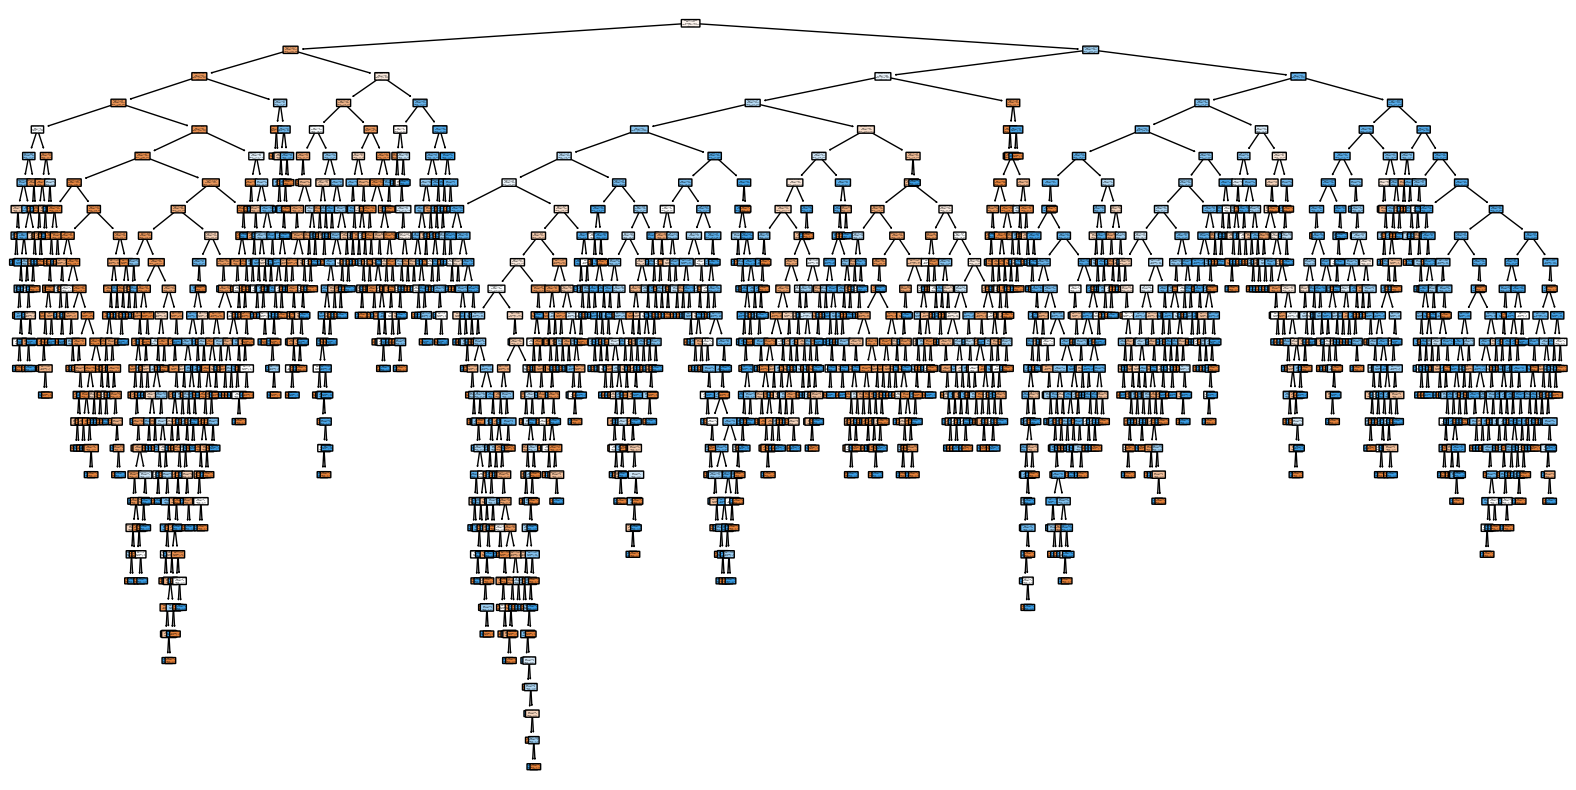

In [4]:
X = data.drop('deposit', axis=1)
y = data['deposit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
accuracy
print('Classification Report:')
print(classification_report(y_test, y_pred))


plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.show()

In [6]:
'''when our model is train we can predict by giving the new customer value'''
new_customer = pd.DataFrame({
    'age': [35],
    'job': ['admin.'],
    'marital': ['married'],
    'education': ['secondary'],
    'default': ['no'],
    'balance': [600],
    'housing': ['yes'],
    'loan': ['no'],
    'contact': ['unknown'],
    'day': [15],
    'month': ['may'],
    'duration': [180],
    'campaign': [1],
    'pdays': [-1],
    'previous': [0],
    'poutcome': ['unknown']
})


for column in new_customer.columns:
    if new_customer[column].dtype == 'object':
        new_customer[column] = label_encoder.fit_transform(new_customer[column])


prediction = clf.predict(new_customer)
print('Prediction:', 'Yes' if prediction[0] == 1 else 'No')

Prediction: No
